# HW 07 
# Gary Fowler


## Exercise 8.1 

### A low-pass filter


Using a simple electronic circuit with one resistor and one capacitor, the circuit acts as a low-pass filter: you send a signal in on the left and it comes out filtered on the right. The equations are as follows:

$$IR = V_{in} - V_{out}$$

$$Q = CV_{out}$$

$$I = \frac{dQ}{dt}$$

Using these three equations we find:

$$\frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in} - V_{out})$$

a) Write a program to solve this equation for $V_{out}(t)$ using the fourth order Runge-Kutta method when the input is a square-wave with frequency and amplitude 1. Make plots of the output from $t = 0$ to $t = 10$ when $RC = 0.01$, $0.1$, and $ 1$ with initial condition $V_{out}(0) = 0$

b) Based on the graphs produced describe what the circuit is doing.

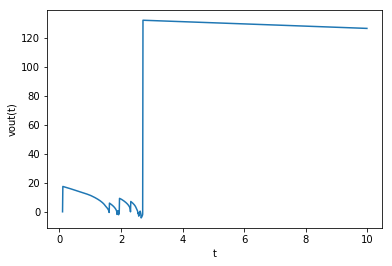

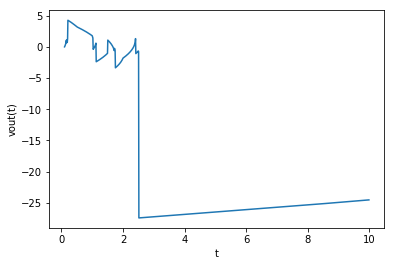

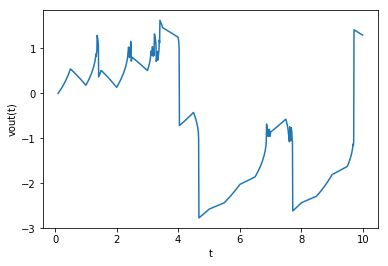

In [19]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt

#this will give us the square-wave initial condition
def vin(t):
    if int(2*t)%2 == 0:
        return 1.0
    else:
        return -1.0
    
    
#this is the function derived above, the initial vout will be 0
#RC will either be .01, .1, or 1 and this is the capacitance and resistance of the circuit
def f(vout,t, RC):
    return 1 / ((RC) * (vin(t) - vout))


#part a

a = 0.1      #lower limit, if we start at 0 our function has 0 in the denominator
b = 10.0     #upper limit
N = 1000     #step number
h = (b-a)/N  #width of each slice

tpoints = np.arange(a,b,h)   #points for time
voutpoints = []              #points for vout
vout = 0.0                   #initial condition
RC = .01                     #initial condition

for t in tpoints:
    voutpoints.append(vout)
    k1 = h*f(vout,t , RC)
    k2 = h*f(vout+0.5*k1, t+0.5*h, RC)
    k3 = h*f(vout+0.5*k2, t+0.5*h, RC)
    k4 = h*f(vout+k3, t+h, RC)
    vout += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,voutpoints)
plt.xlabel("t")
plt.ylabel("vout(t)")
plt.show()

tpoints = np.arange(a,b,h)   #points for time
voutpoints = []              #points for vout
vout = 0.0                   #initial condition
RC = .1                      #initial condition

for t in tpoints:
    voutpoints.append(vout)
    k1 = h*f(vout,t , RC)
    k2 = h*f(vout+0.5*k1, t+0.5*h, RC)
    k3 = h*f(vout+0.5*k2, t+0.5*h, RC)
    k4 = h*f(vout+k3, t+h, RC)
    vout += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,voutpoints)
plt.xlabel("t")
plt.ylabel("vout(t)")
plt.show()

tpoints = np.arange(a,b,h)   #points for time
voutpoints = []              #points for vout
vout = 0.0                   #initial condition
RC = 1                       #initial condition

for t in tpoints:
    voutpoints.append(vout)
    k1 = h*f(vout,t , RC)
    k2 = h*f(vout+0.5*k1, t+0.5*h, RC)
    k3 = h*f(vout+0.5*k2, t+0.5*h, RC)
    k4 = h*f(vout+k3, t+h, RC)
    vout += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,voutpoints)
plt.xlabel("t")
plt.ylabel("vout(t)")
plt.show()


### part b

This circuit seems to have a lot of noise at the beginning and then kind of equal out or clean it up. The only time it had trouble cleaning up the noise was when RC was larger.

## Exercise 8.2 

### The Lotka-Volterra equations


The Lotka-Volterra equations are a mathematical model of predator-prety interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (prey) and "foxes" (predators). The populations are in thousands, so if $x$ = 2 then there are 2000 rabbits. Therefore x and y must be multiples of .001 to keep whole numbers, as we can not have partial rabbits and foxes.

Thus the equation for rabbits is:
$$\frac{dx}{dt} = \alpha x - \beta xy$$
Where rabbits reproduce at a rate proportional to their population, but are eaten at a rate proportional to both their own poplulation and the population of foxes.

At the same time foxes reproduce at a rate proportional to the rate at which they eat rabbits, but also die of old age at a rate proportional to their own population:
$$\frac{dy}{dt} = \gamma xy - \delta y$$

Where $\alpha$, $\beta$ ,$\gamma$, $\delta$ are constant.

a) Write a program to solve these equations using fourth order Runge-Kutta method for:
$\alpha$ = 1, $\beta$ = $\gamma$ = 0.5, $\delta$ = 2, starting from the initial condition: $x$ = $y$ = 2. Make a graph showing both x and y as a function of time from $t$ = 0 to $t$ = 30.

b) Describe in words what is going on in terms of rabbits and foxes

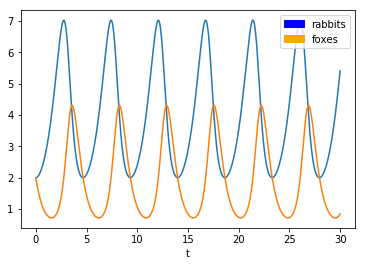

In [32]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#part a

#constants for populations
alpha = 1
beta = 0.5
gamma = 0.5
delta = 2


def f(r):
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return np.array([fx,fy],float)
    

a = 0.0      #lower limit
b = 30.0     #upper limit
N = 10000    #step number
h = (b-a)/N  #width of each slice

tpoints = np.arange(a,b,h)   #points for time
xpoints = []                 #points for x, rabbits
ypoints = []                 #points for y, foxes

r = np.array([2.0,2.0],float) #initial condition

for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r)
    k2 = h*f(r+0.5*k1)
    k3 = h*f(r+0.5*k2)
    k4 = h*f(r+k3)
    r += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,xpoints)
plt.plot(tpoints,ypoints)
rabbit_patch = mpatches.Patch(color = 'blue', label = 'rabbits')
fox_patch = mpatches.Patch(color = 'orange', label = 'foxes')
plt.legend(handles=[rabbit_patch,fox_patch])
plt.xlabel("t")
plt.show()

### part b

The rabbits explode in population, reach a peak, and then begin a decline as more foxes enter the habitat. Just before the rabbit population peaks, the fox population begins to explode from the increase in food(rabbits). As the fox population rises, the rabbit population nose-dives. The fox population then reaches its peak as food becomes scarce. The cycle begins again after the fox population dips below the rabbit population.

As long as no external influences occur it seems logical that this trend would continue indefinitely.


## Exercise 8.3 

### The Lorenz equations


The Lorenz equations are as follows:
$$\frac{dx}{dt} = \sigma(y-x),  \frac{dy}{dt} = rx-y-xz,  \frac{dz}{dt} = xy-bz$$

where $\sigma$,$r$, and $b$ are constants. These equations were one of the first incontrovertible examples of deterministic chaos.

a) Write a program to solve the Lorenz equations for the case $\sigma$ = 10, $r$ = 28, and b = $\frac{8}{3}$ in the range from $t$ = 0 to $t$ = 50 with initial conditions (x,y,z) = (0,1,0). Make a plot of y as a function of time.

b) Modify the program to produce a plot of z against x. The plot should look like the famous "strange attractor" of the Lorenze equations.

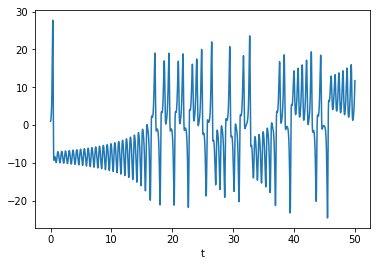

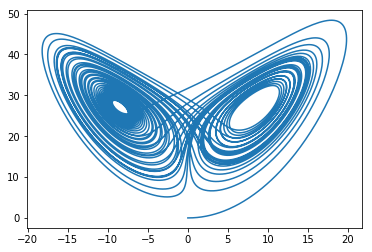

In [36]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt

#part a

#constants for Lorenz equations given above
sigma = 10
r = 28
b = 8/3

def f(c):
    x = c[0]    
    y = c[1]
    z = c[2]
    fx = sigma*(y-x)
    fy = r*x-y-x*z
    fz = x*y - b*z
    return np.array([fx,fy,fz],float)
    

lowlim = 0.0     #lower limit
uplim = 50.0     #upper limit
N = 1000         #step number
h = (b-a)/N      #width of each slice

tpoints = np.arange(lowlim,uplim,h)   #points for time
xpoints = []                          #points for x
ypoints = []                          #points for y
zpoints = []                          #points for z

c = np.array([0.0,1.0,0.0],float) #intial condition

for t in tpoints:
    xpoints.append(c[0])
    ypoints.append(c[1])
    zpoints.append(c[2])
    k1 = h*f(c)
    k2 = h*f(c+0.5*k1)
    k3 = h*f(c+0.5*k2)
    k4 = h*f(c+k3)
    c += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,ypoints)
plt.xlabel("t")
plt.show()
#part b
plt.plot(xpoints,zpoints)
plt.show()

## Exercise 8.4 

### Nonlinear Pendulum


Using results from Example 8.6 in the book on linear pendulums, calculate the motion of a nonlinear pendulum.

a) Write a program to solve the two first-order equations:
$$\frac{d\theta}{dt} = \omega, \frac{d\omega}{dt} = \frac{-g}{l}sin\theta$$

using the fourth-order Runge-Kutta method for a pendulum with a 10cm arm. Use the program to calculate $\theta$ of displacement for several periods of the pendulum when it is released from standstill at $\theta$ = 179 degrees from vertical. Make a graph of $\theta$ as a function of time.

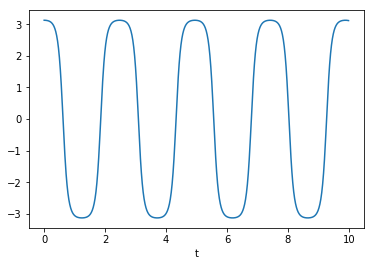

In [2]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt
from vpython import *

#part a

#constants for pendulum equations
g = 9.81   #acceleration due to gravity
l = .1     #10cm converted to meters

def f(c):
    theta = c[0]    
    omega = c[1]
    ftheta = omega
    fomega = -(g / l)*np.sin(theta)
    return np.array([ftheta,fomega],float)
    

a = 0.0      #lower limit
b = 10.0     #upper limit
N = 1000     #step number
h = (b-a)/N  #width of each slice

tpoints = np.arange(a,b,h)       #points for time
thetapoints = []                 #points for theta
omegapoints = []                 #points for omega


c = np.array([179.0*np.pi / 180,0.0],float) #intial condition, theta = 179 degrees from rest converted to radians (omega = 0)

for t in tpoints:
    thetapoints.append(c[0])
    omegapoints.append(c[1])
    k1 = h*f(c)
    k2 = h*f(c+0.5*k1)
    k3 = h*f(c+0.5*k2)
    k4 = h*f(c+k3)
    c += (k1+2*k2+2*k3+k4)/6

plt.plot(tpoints,thetapoints)
plt.xlabel("t")
plt.show()


## Exercise 8.7 

### Trajectory with air resistance

Consider a cannonball shot from a cannon standing on level ground. The air resistance is:
$$F = \frac{1}{2}\pi R^2 \rho Cv^2$$

where R is the radius, $\rho$ is the density of air, $v$ is the velocity, and C is the coeffecient of drag.

a) Starting from Newton's Second Law, $F = ma$ show that the equations of motion for the position (x,y) of the cannonball are:
$$\frac{d^2x}{dt^2}= - \frac{ \pi R^2 \rho C}{2m} \frac{dx}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $$
$$\frac{d^2y}{dt^2}= - g - \frac{ \pi R^2 \rho C}{2m} \frac{dy}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $$

b) Change these two second-order equations into four first-order equations.
Now write a program that solves the equations give: cannonball mass = 1kg, radius = 8cm, $\theta$ = 30 degrees, velocity = 100ms$^{-1}$. Density of air is: $\rho$ = 1.22kgm$^{-3}$ and C = 0.47. Make a plot of the trajectory of the cannonball.

### part a

Newton's Second Law
$$F = ma$$

The Force we care about
$$F = \frac{1}{2}\pi R^2 \rho Cv^2$$

Solving for acceleration
$$\frac{1}{2}\pi R^2 \rho Cv^2 = ma$$
$$\frac{\pi R^2 \rho Cv^2}{2m} = a$$

The acceleration is the second derivative of the position
$$a = \frac{d^2x}{dt^2}$$

$$\frac{d^2x}{dt^2} = \frac{\pi R^2 \rho C * v_x * v}{2m}$$

The x direction velocity is the first derivative of the position
$$v_x = \frac{dx}{dt}$$

But we also care about the total velocity in both the x and y direction.
This second v then becomes: 

$$\sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2}$$

Finally adding all this together we get:
$$\frac{d^2x}{dt^2}= - \frac{ \pi R^2 \rho C}{2m} \frac{dx}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $$

Similarly we can derive the y direction but we also need to care about gravity, thus:
$$\frac{d^2y}{dt^2}= - g - \frac{ \pi R^2 \rho C}{2m} \frac{dy}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $$

In this version we subtract g, but other than that the derivation is the same just our position variable is y instead of x.

### part b

#### equation 1
$\frac{d^2x}{dt^2}= - \frac{ \pi R^2 \rho C}{2m} \frac{dx}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $

$$\frac{dx}{dt} = v_x, \frac{dv_x}{dt} = \frac{\pi R^2 \rho C}{2m}$$

#### equation 2
$\frac{d^2y}{dt^2}= - g - \frac{ \pi R^2 \rho C}{2m} \frac{dy}{dt} \sqrt{ \frac{dx}{dt}^2 + \frac{dy}{dt}^2} $

$$\frac{dy}{dt} = v_y, \frac{dv_y}{dt} = -g - \frac{\pi R^2 \rho C}{2m} $$

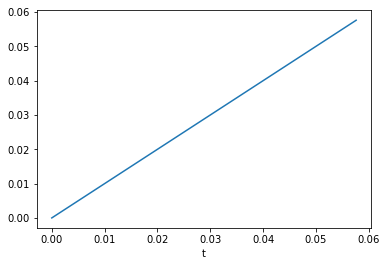

In [5]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt
from vpython import *

#part a

#constants for the motion equations
g = 9.81   #acceleration due to gravity
m = 1000   #1kg mass
R = .08    #8cm radius
theta = 30 #30 degree angle
v = 100    #100m/s
rho = 1220 #1.22kg/m
C = 0.47   #coeffecient of drag for a sphere


def f(c):
    x = c[2]*np.cos(theta)
    y = c[3]*np.sin(theta)
    vx = c[0]*np.sqrt(x*x + y*y)
    vy = c[1]*np.sqrt(x*x + y*y)
    fvx = vx
    fvy = vy
    fx = (np.pi*R*R*rho*C) / (2*m)
    fy = (np.pi*R*R*rho*C) / (2*m)
    return np.array([fvx,fvy,fx,fy],float)
    

a = 0.0      #lower limit
b = 10.0     #upper limit
N = 1000     #step number
h = (b-a)/N  #width of each slice

tpoints = np.arange(a,b,h)    #points for time
vxpoints = []                 #points for x velocity
vypoints = []                 #points for y velocity
xpoints = []                  #points for x position
ypoints = []                  #points for y position


c = np.array([100,0.0,0.0,0.0],float) #intial condition, x velocity is 100, y velocity is 0

for t in tpoints:
    vxpoints.append(c[0])
    vypoints.append(c[1])
    xpoints.append(c[2])
    ypoints.append(c[3])
    k1 = h*f(c)
    k2 = h*f(c+0.5*k1)
    k3 = h*f(c+0.5*k2)
    k4 = h*f(c+k3)
    c += (k1+2*k2+2*k3+k4)/6

plt.plot(xpoints,ypoints)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise 8.8 

### Space garbage

A heavy steal rod and a spherical ball-bearing, discarded by a passing spaceship, are floating in zero gravity and the ball bearing is orbiting around the rod under the effect of its gravitational pull. Assume the rod is of negligible cross-section and heavy enough that it doesn't move significantly, and that the ball bearing is orbiting around the rod's mid-point in a plane perpendicular to the rod.

The equations of motion for x and y are as follows:

$$\frac{d^2x}{dt^2}= - GM\frac{x}{r^2\sqrt{r^2 + L^2 / 4}}, \frac{d^2y}{dt^2}= - GM\frac{y}{r^2\sqrt{r^2 + L^2 / 4}}$$

Where $r = \sqrt{x^2 + y^2}$

Convert these to four first-order equations.

Then write a program with initial conditions G = 1, M = 10, L = 2, x = 1, y = 0 velocity of +1 in the y direction.
Calculate the orbit from t = 0 to t = 10 and make a plot of it.

#### Conversion

equation 1

$\frac{d^2x}{dt^2}= - GM\frac{x}{r^2\sqrt{r^2 + L^2 / 4}}$
$$\frac{dx}{dt} = v_x, \frac{dv_x}{dt} = - GM\frac{x}{r^2\sqrt{r^2 + L^2 / 4}}$$

equation 2

$\frac{d^2y}{dt^2}= - GM\frac{y}{r^2\sqrt{r^2 + L^2 / 4}}$
$$\frac{dy}{dt} = v_y, \frac{dv_y}{dt} = - GM\frac{y}{r^2\sqrt{r^2 + L^2 / 4}}$$


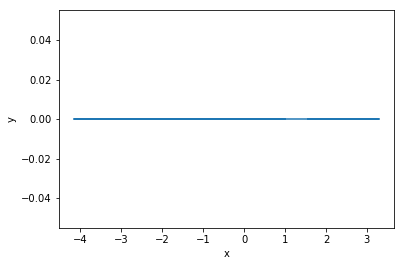

In [5]:
## @author: Gary Fowler

import numpy as np
import matplotlib.pyplot as plt

#constants for the orbit equations
M = 10
L = 2


def f(c,t):
    x = c[0]*t
    y = c[1]*t
    r = np.sqrt(x*x + y*y)
    vx = M / r
    vy = M / r
    #fx = vx
    #fy = vy
    fvx = x*(-M) / (r*r*np.sqrt(r*r+(L*L/4)))
    fvy = y*(-M) / (r*r*np.sqrt(r*r+(L*L/4)))
    return np.array([fvx,fvy],float)
    

a = 0.1      #lower limit, cannot divide by 0 so start at 1/10th of a second
b = 10.0     #upper limit
N = 1000     #step number
h = (b-a)/N  #width of each slice

tpoints = np.arange(a,b,h)    #points for time
xpoints = []                  #points for x position
ypoints = []                  #points for y position


c = np.array([1.0,0.0],float) #intial condition

for t in tpoints:
    xpoints.append(c[0])
    ypoints.append(c[1])
    k1 = h*f(c,t)
    k2 = h*f(c+0.5*k1,t+0.5*h)
    k3 = h*f(c+0.5*k2,t+0.5*h)
    k4 = h*f(c+k3,t+h)
    c += (k1+2*k2+2*k3+k4)/6

plt.plot(xpoints,ypoints)
plt.xlabel("x")
plt.ylabel("y")
plt.show()